In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [5]:
!pip install s3fs

In [3]:
df = pd.read_csv("s3://dev-ds-raw-data-1654/BankChurners.csv")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [8]:
df.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [9]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['attrition_flag', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

In [13]:
cat_cols = ['attrition_flag', 'gender', 'education_level', 'marital_status', 'income_category', 'card_category']
for col in cat_cols:
  df[col] = df[col].str.strip().str.lower()

In [14]:
def makenan(a):
  if a<=0:
    return np.nan
  else:
    return a

In [15]:
num_cols_1 = ['customer_age', 'total_relationship_count', 'credit_limit', 'avg_open_to_buy']
for col in num_cols_1:
  df[col] = df[col].apply(makenan)

In [16]:
def makenan1(a):
  if a<0:
    return np.nan
  else:
    return a

In [17]:
num_cols_2 = ['months_inactive_12_mon' , 'contacts_count_12_mon', 'total_amt_chng_q4_q1','total_revolving_bal', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

for col in num_cols_2:
  df[col] = df[col].apply(makenan1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op


Number of missing values in attrition_flag:
0

Number of unique categories in attrition_flag:
2

Frequency Distribution of attrition_flag:
attrition_flag
existing customer    0.83934
attrited customer    0.16066
Name: proportion, dtype: float64


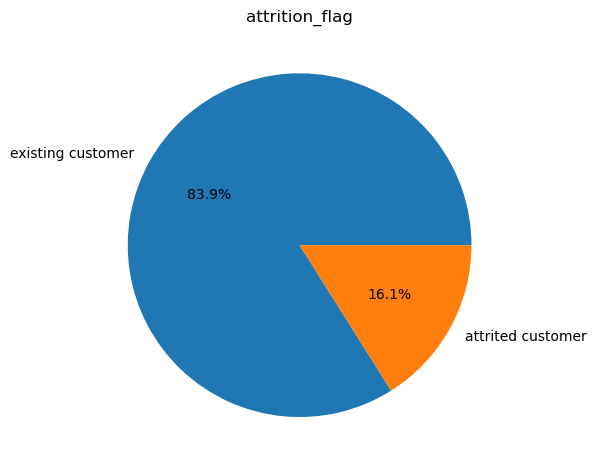


Number of missing values in gender:
0

Number of unique categories in gender:
2

Frequency Distribution of gender:
gender
f    0.529081
m    0.470919
Name: proportion, dtype: float64


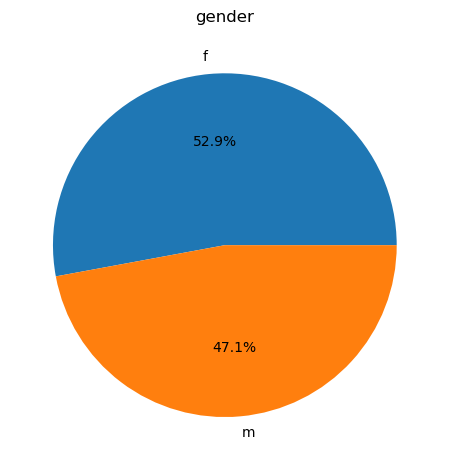


Number of missing values in education_level:
0

Number of unique categories in education_level:
7

Frequency Distribution of education_level:
education_level
graduate         0.308877
high school      0.198776
unknown          0.149995
uneducated       0.146835
college          0.100030
post-graduate    0.050953
doctorate        0.044534
Name: proportion, dtype: float64


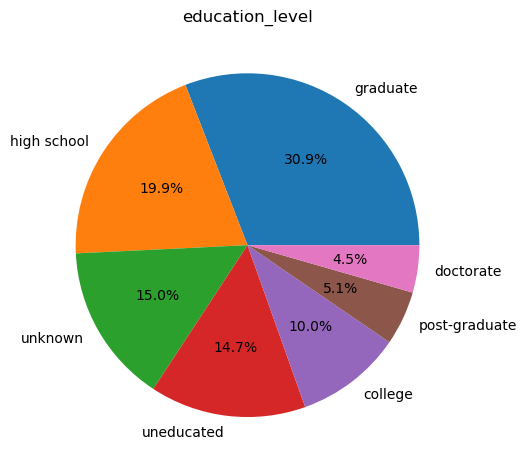


Number of missing values in marital_status:
0

Number of unique categories in marital_status:
4

Frequency Distribution of marital_status:
marital_status
married     0.462822
single      0.389355
unknown     0.073961
divorced    0.073862
Name: proportion, dtype: float64


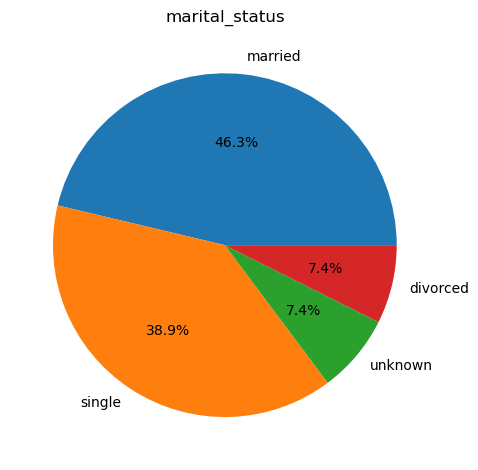


Number of missing values in income_category:
0

Number of unique categories in income_category:
6

Frequency Distribution of income_category:
income_category
less than $40k    0.351634
$40k - $60k       0.176755
$80k - $120k      0.151575
$60k - $80k       0.138442
unknown           0.109805
$120k +           0.071788
Name: proportion, dtype: float64


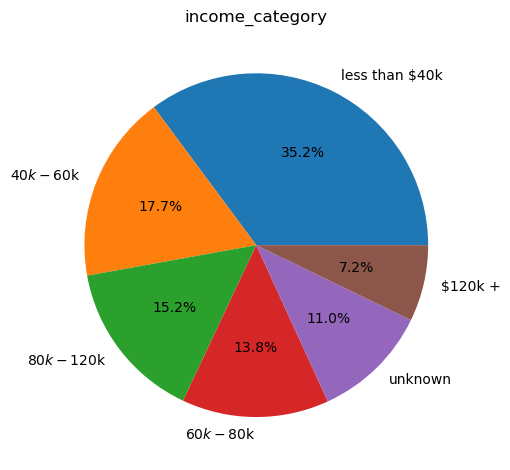


Number of missing values in card_category:
0

Number of unique categories in card_category:
4

Frequency Distribution of card_category:
card_category
blue        0.931767
silver      0.054804
gold        0.011455
platinum    0.001975
Name: proportion, dtype: float64


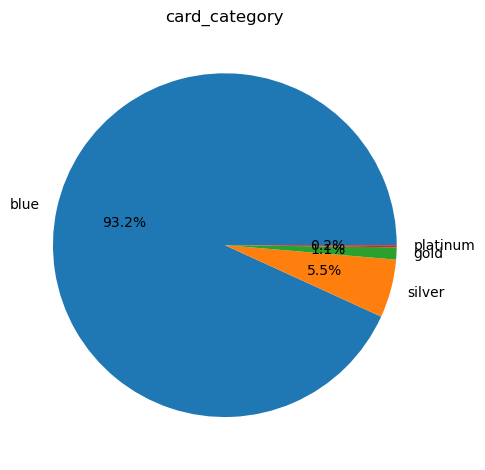

In [19]:
cat_cols = ['attrition_flag', 'gender', 'education_level', 'marital_status', 'income_category', 'card_category']

for col in cat_cols:
    print(f"\nNumber of missing values in {col}:")
    print(df[df[col]=='missing'][col].count())
    print(f"\nNumber of unique categories in {col}:")
    num_unique = df[col].nunique()
    print(num_unique)

    if num_unique > 10:
        print(f"\nFrequency Distribution of top 10 in {col} (including 'Other'):")

        top10 = df[col].value_counts(normalize=True).nlargest(10)

        temp_col = df[col].apply(lambda x: x if x in top10 else 'Other')

        freq = temp_col.value_counts(normalize=True)
        print(freq)

        plot_data = temp_col[temp_col != 'Other'].value_counts()
        plot_data.plot(kind='bar', title=f"{col} (Top Categories Only)")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        #plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()

    else:
        print(f"\nFrequency Distribution of {col}:")
        print(df[col].value_counts(normalize=True))
        df[col].value_counts().plot(kind='pie', autopct='%0.1f%%', title=col)
        plt.ylabel("")
        plt.tight_layout()
        #plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()



missing values of customer_age:
0

statistics of customer_age:
count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: customer_age, dtype: float64

skewness of customer_age:
-0.033605016317173456


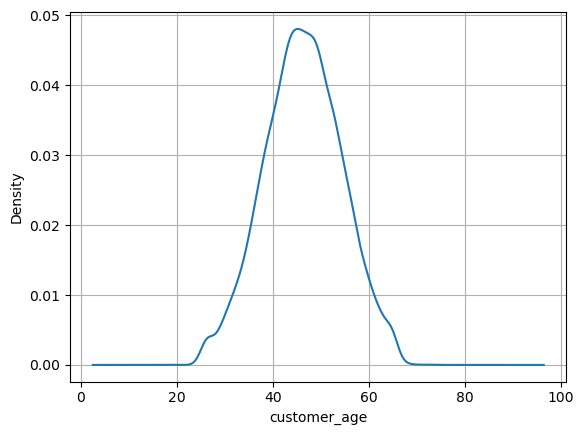

upper bound= 70.3764024017847
lower bound= 22.275518206490204

% of outliers= 0.009874592673052237

missing values of total_relationship_count:
0

statistics of total_relationship_count:
count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: total_relationship_count, dtype: float64

skewness of total_relationship_count:
-0.16245241498173682


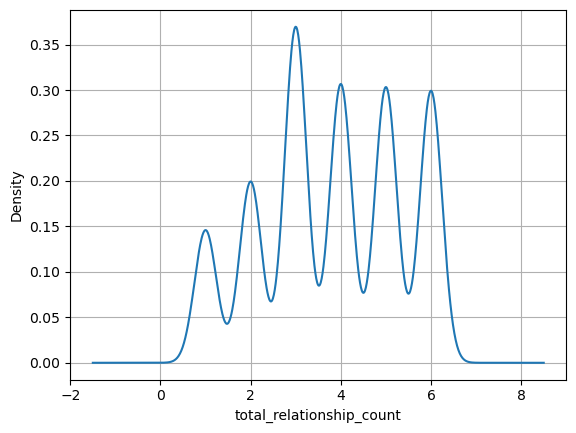

upper bound= 8.475803827081982
lower bound= -0.8506433649510461

% of outliers= 0.0

missing values of credit_limit:
0

statistics of credit_limit:
count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: credit_limit, dtype: float64

skewness of credit_limit:
1.666725807993647


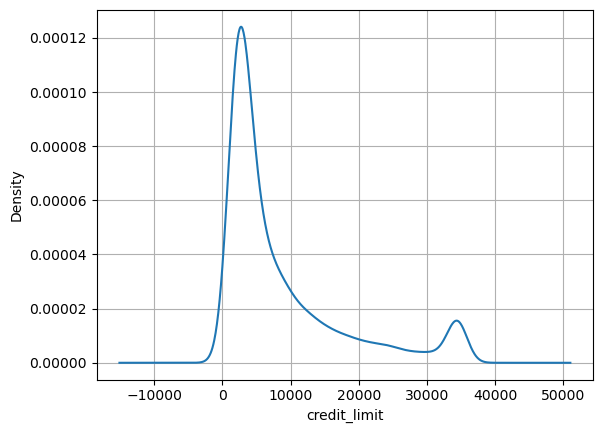

upper bound= 23836.25
lower bound= -10213.75

% of outliers= 9.7165991902834

missing values of avg_open_to_buy:
0

statistics of avg_open_to_buy:
count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: avg_open_to_buy, dtype: float64

skewness of avg_open_to_buy:
1.6616965459311595


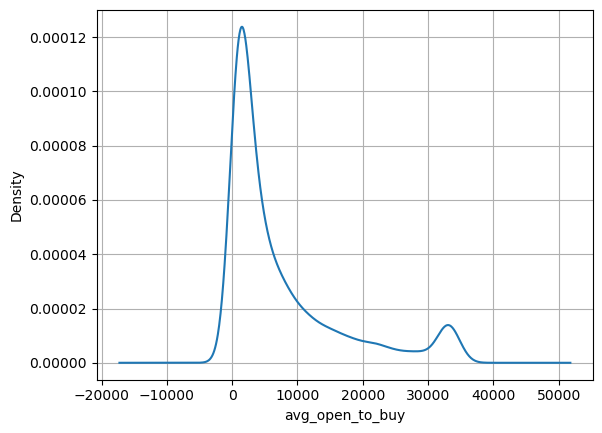

upper bound= 22660.75
lower bound= -11477.25

% of outliers= 9.509232744149303

missing values of months_inactive_12_mon:
0

statistics of months_inactive_12_mon:
count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: months_inactive_12_mon, dtype: float64

skewness of months_inactive_12_mon:
0.6330611289713137


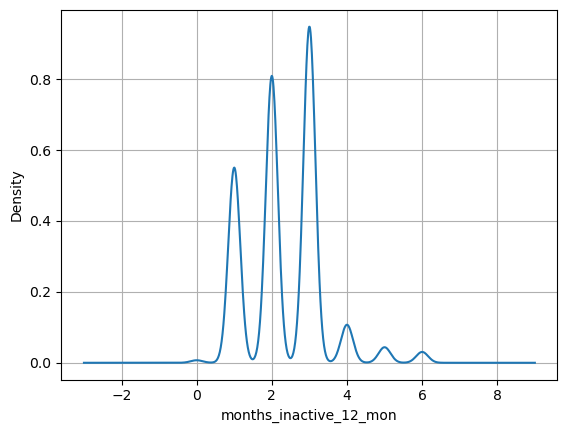

upper bound= 5.373034375108723
lower bound= -0.6907000214008137

% of outliers= 1.2244494914584774

missing values of contacts_count_12_mon:
0

statistics of contacts_count_12_mon:
count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: contacts_count_12_mon, dtype: float64

skewness of contacts_count_12_mon:
0.011005626218976492


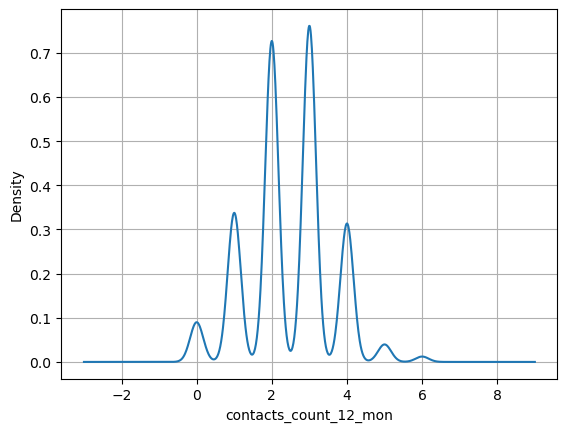

upper bound= 5.77399289606212
lower bound= -0.8633579597532428

% of outliers= 0.5332280043448208

missing values of total_amt_chng_q4_q1:
0

statistics of total_amt_chng_q4_q1:
count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: total_amt_chng_q4_q1, dtype: float64

skewness of total_amt_chng_q4_q1:
1.7320634114286038


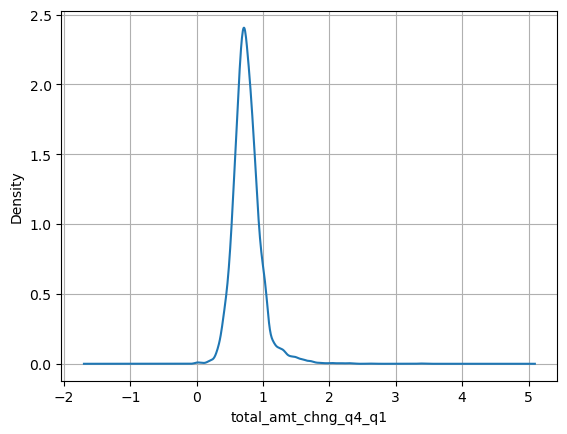

upper bound= 1.201
lower bound= 0.28900000000000003

% of outliers= 3.910338698528686

missing values of total_revolving_bal:
0

statistics of total_revolving_bal:
count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: total_revolving_bal, dtype: float64

skewness of total_revolving_bal:
-0.14883725028007228


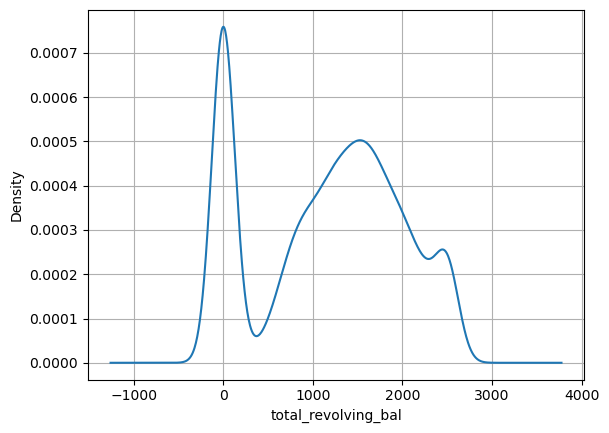

upper bound= 3607.7760671272754
lower bound= -1282.1479442873424

% of outliers= 0.0

missing values of total_trans_amt:
0

statistics of total_trans_amt:
count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: total_trans_amt, dtype: float64

skewness of total_trans_amt:
2.0410034025756936


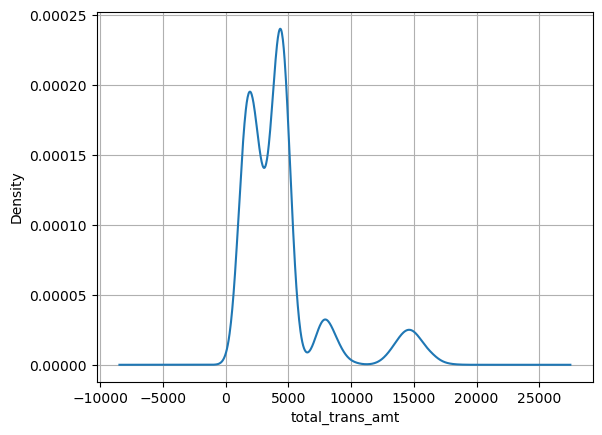

upper bound= 8619.25
lower bound= -1722.75

% of outliers= 8.847635035054804

missing values of total_trans_ct:
0

statistics of total_trans_ct:
count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: total_trans_ct, dtype: float64

skewness of total_trans_ct:
0.15367306849872275


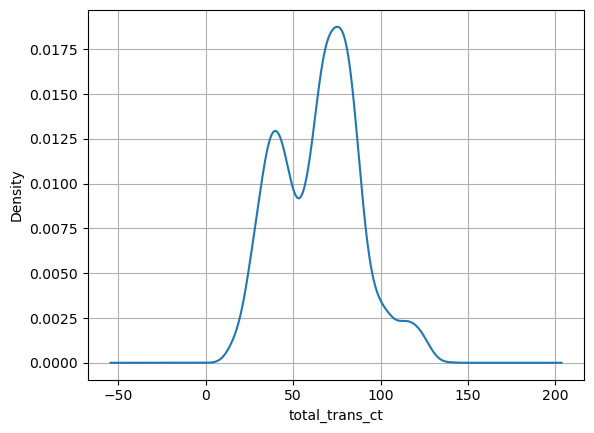

upper bound= 135.27640592654777
lower bound= -5.559016768850512

% of outliers= 0.019749185346104474

missing values of total_ct_chng_q4_q1:
0

statistics of total_ct_chng_q4_q1:
count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: total_ct_chng_q4_q1, dtype: float64

skewness of total_ct_chng_q4_q1:
2.0640305679077477


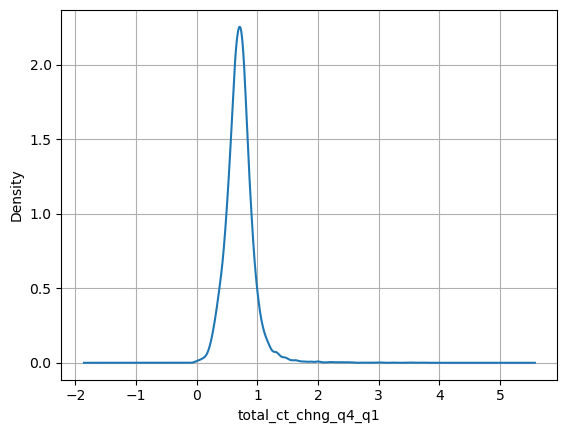

upper bound= 1.172
lower bound= 0.22799999999999998

% of outliers= 3.890589513182581

missing values of avg_utilization_ratio:
0

statistics of avg_utilization_ratio:
count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: avg_utilization_ratio, dtype: float64

skewness of avg_utilization_ratio:
0.7180079967731994


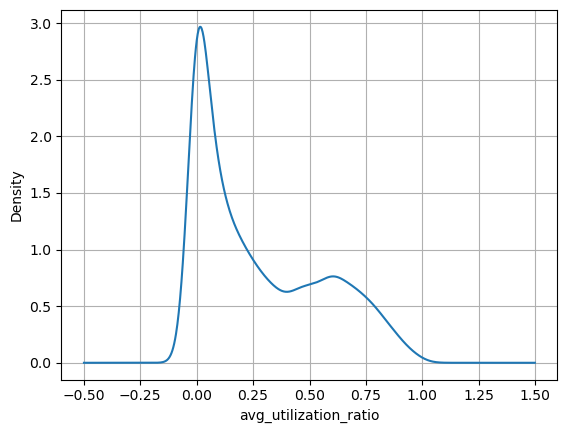

upper bound= 1.1019679596481644
lower bound= -0.5521808558661954

% of outliers= 0.0


In [20]:
num_cols_1 = ['customer_age', 'total_relationship_count', 'credit_limit', 'avg_open_to_buy', 'months_inactive_12_mon' , 'contacts_count_12_mon', 'total_amt_chng_q4_q1','total_revolving_bal', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

for col in num_cols_1:
  print(f'\nmissing values of {col}:')
  print(df[col].isnull().sum())
  print(f"\nstatistics of {col}:")
  print(df[col].describe())
  print(f"\nskewness of {col}:")
  print(df[col].skew())
  df[col].plot(kind='kde')
  plt.xlabel(col)
  plt.grid(True)
  #plt.savefig(f"{col}_NUM_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
  plt.show()

  if df[col].skew()>-1 and df[col].skew()<1:
    uplim = df[col].mean() + 3*df[col].std()
    lowlim = df[col].mean() - 3*df[col].std()
    print('upper bound=',uplim)
    print('lower bound=',lowlim)
    print(f'\n% of outliers=', df[(df[col]>uplim) | (df[col]<lowlim)][col].count()*100/df[col].count())
  else:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    uplim = q3 + 1.5*iqr
    lowlim = q1 - 1.5*iqr
    print('upper bound=',uplim)
    print('lower bound=',lowlim)
    print(f'\n% of outliers=', df[(df[col]>uplim) | (df[col]<lowlim)][col].count()*100/df[col].count())

In [21]:
df.to_parquet("s3://dev-ds-clean-data-1654/clean_data.parquet", engine='pyarrow', index=False)